In [1]:
from GG_mthesis import *
%matplotlib inline

In [2]:
def obtain_distances(path):
    df = pd.read_csv(path, index_col=0, parse_dates=['datetime'])
    df['distance'] = np.insert(gsw.distance(df['lon'], df['lat']),0,0)
    df = df.reset_index()
    df = df[df['distance'] < 1000]
    #dist_limit = np.percentile(df['distance'], 95)
    #df = df[df['distance'] <= dist_limit]
    df = df[df['distance'] > 200].reset_index(drop=True)
    return df

In [3]:
#obtain_distances('data/02_intermediate/SOCAT/33LG20020322.csv').append(obtain_distances('data/02_intermediate/SOCAT/06AQ20120318.csv'))

In [4]:
path = 'data/02_intermediate/SOCAT'
from fileinput import filename
import os
data_all_raw = pd.DataFrame()
for file in os.listdir(path):
    filename = path +'/' + file
    df = pd.read_csv(filename, index_col=0, parse_dates=['datetime'])
    data_all_raw = data_all_raw.append(df)

In [3]:
path = 'data/02_intermediate/SOCAT'
from fileinput import filename
import os
data_all = pd.DataFrame()
for file in os.listdir(path):
    filename = path +'/' + file
    data_all = data_all.append(obtain_distances(filename))

data_all['distance2'] = np.insert(gsw.distance(data_all['lon'], data_all['lat']),0,0)
data_all

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]


,datetime,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],SA,CT,rho,distance,distance2
0,2021-01-05 07:42:00,69920201226,C,-65.69037,-55.47937,NaN,34.012,6.604,NaN,33.723,2567.0,62.0,34.172751,6.609784,1026.695273,369.175674,0.000000
1,2021-01-05 07:43:00,69920201226,C,-65.68552,-55.47758,NaN,34.010,6.603,NaN,33.723,2620.0,62.0,34.170741,6.608811,1026.693829,364.725227,364.725227
2,2021-01-05 07:44:00,69920201226,C,-65.68065,-55.47582,NaN,34.014,6.601,NaN,33.723,2653.0,62.0,34.174760,6.606755,1026.697247,363.989202,363.989202
3,2021-01-05 07:45:00,69920201226,C,-65.67589,-55.47419,NaN,34.014,6.596,NaN,33.723,2670.0,62.0,34.174760,6.601753,1026.697908,350.485465,350.485465
4,2021-01-05 07:46:00,69920201226,C,-65.67108,-55.47243,NaN,34.009,6.593,NaN,33.723,2687.0,62.0,34.169736,6.598820,1026.694362,360.828737,360.828737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-12-03 10:49:00,74JC20181202,C,-57.98340,-55.18830,NaN,34.130,5.890,7.03,34.058,3277.0,345.0,34.291678,5.893964,1026.880428,737.115513,737.115513
8,2018-12-27 20:04:00,74JC20181202,C,-66.05740,-61.12980,NaN,33.790,2.290,3.23,33.768,3396.0,336.0,33.951145,2.296199,1026.981646,997.985486,811652.369321
9,2018-12-27 20:35:00,74JC20181202,C,-66.07300,-61.06750,NaN,33.770,2.080,2.75,33.768,3461.0,340.0,33.931022,2.086244,1026.982262,995.464189,6977.988346
10,2018-12-28 08:37:00,74JC20181202,C,-65.77270,-59.33140,NaN,33.830,2.060,2.82,33.867,3672.0,402.0,33.990647,2.065807,1027.031323,281.895062,193756.947050


In [28]:
print('Distance mean = ' + str(data_all['distance'].mean()) + ' m')
print('Distance median = ' + str(data_all['distance'].median()) + ' m')
print('Distance min = ' + str(data_all['distance'].min()) + ' m')
print('Distance max = ' + str(data_all['distance'].max()) + ' m')

Distance mean = 793.0445506621656 m
Distance median = 845.9205507305778 m
Distance min = 200.0274522763275 m
Distance max = 999.9998240278604 m


In [21]:
len(data_all['Expocode'].unique())

149

In [14]:
data_all = data_all.loc[data_all['QC_Flag'].isin(['A','B'])]

In [16]:
def calc_bx(df):
    g = 9.81 #m s-2
    rho_0 = 1027 #kg m-3
    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/df['distance'])
    return df

In [132]:
#def calc_bx(df):
#    g = 9.81 #m s-2
#    rho_0 = 1027 #kg m-3
#    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/df['distance'])
#    return df
#
#def segment_cruise(df):
#    
#    from GG_mthesis.SOCAT_processing import SOCAT
#    index_dist = df[df['distance2'] > 1000].index
#    if len(index_dist) > 0:
#        df_ini = df[:index_dist[0]]
#        #df_ini = calc_bx(df_ini)
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        for i in range(len(index_dist)-1):
#            df_aux = df[index_dist[i]:index_dist[i+1]]
#            df_aux['distance_cum'] = df_aux['distance'].cumsum()
#            df_aux = SOCAT.downsample(df_aux, 1000)
#            df_aux = calc_bx(df_aux)A
#            df_ini = df_ini.append(df_aux)
#        return df_ini
#    else:
#        df_ini = calc_bx(df)
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#
#        return df_ini

In [11]:
#def calc_bx(df, distance=1000):
#    g = 9.81 #m s-2
#    rho_0 = 1027 #kg m-3
#    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/distance)
#    return df
#
#def segment_cruise(df):
#    from GG_mthesis.SOCAT_processing import SOCAT
#    index_dist = df[df['distance2'] > 1000].index
#    if len(index_dist) > 0:
#        df_ini = df[:index_dist[0]]
#        #df_ini = calc_bx(df_ini)
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        for i in range(len(index_dist)-1):
#            df_aux = df[index_dist[i]:index_dist[i+1]]
#            if len(df_aux) > 1:
#                df_aux['distance_cum'] = df_aux['distance'].cumsum()
#                df_aux = SOCAT.downsample(df_aux, 1000)
#                df_aux = calc_bx(df_aux)
#                df_ini = df_ini.append(df_aux)
#        return df_ini
#    else:
#        df_ini = df
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        df_ini = SOCAT.downsample(df_ini, 1000)
#        df_ini = calc_bx(df)
#        return df_ini

In [39]:
#def calc_bx(df, distance=1000):
#    g = 9.81 #m s-2
#    rho_0 = 1027 #kg m-3
#    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/distance)
#    return df
#
#def segment_cruise(df):
#    from GG_mthesis.SOCAT_processing import SOCAT
#    index_dist = df[df['distance2'] > 1000].index
#    if len(index_dist) > 0:
#        df_ini = df[:index_dist[0]]#
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        if len(df_ini) > 1:
#            df_ini = SOCAT.downsample(df_ini, 1000)
#            df_ini = calc_bx(df_ini)
#            #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
#        for i in range(len(index_dist)-1):
#            df_aux = df[index_dist[i]:index_dist[i+1]]
#            if len(df_aux) > 3:
#                df_aux['distance_cum'] = df_aux['distance'].cumsum()
#                df_aux = SOCAT.downsample(df_aux, 1000)
#                df_aux = calc_bx(df_aux)
#                #df_aux['distance'] = np.insert(gsw.distance(df_aux['lon'], df_aux['lat']),0,0)
#                df_ini = df_ini.append(df_aux)
#        return df_ini
#    else:
#        df_ini = df
#        df_ini['distance_cum'] = df_ini['distance'].cumsum()
#        df_ini = SOCAT.downsample(df_ini, 1000)
#        df_ini = calc_bx(df)
#        #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
#        return df_ini

In [20]:
def segment_cruise(df):
    from GG_mthesis.SOCAT_processing import SOCAT
    index_dist = df[df['distance2'] > 1000].index
    if len(index_dist) > 0:
        df_ini = df[:index_dist[0]]
        df_ini['distance_cum'] = df_ini['distance'].cumsum()
        if len(df_ini) > 2:
            df_ini = SOCAT.downsample(df_ini, 1000)
            df_ini = calc_bx(df_ini)
            #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        for i in range(len(index_dist)-1):
            df_aux = df[index_dist[i]:index_dist[i+1]]
            if len(df_aux) > 2:
                df_aux['distance_cum'] = df_aux['distance'].cumsum()
                df_aux = SOCAT.downsample(df_aux, 1000)
                df_aux = calc_bx(df_aux)
                #df_aux['distance'] = np.insert(gsw.distance(df_aux['lon'], df_aux['lat']),0,0)
                df_ini = df_ini.append(df_aux)
        return df_ini
    else:
        
        df['distance_cum'] = df['distance'].cumsum()
        df = SOCAT.downsample(df, 1000)
        df = calc_bx(df)
        #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        return df

In [21]:
def downsample(df, gridsize):
    """
    Grids the data to a equally distance grid.

    Args:
        df (pd.dataframe): pandas dataframe with the North-South sorted TSG transect.
        gridsize (float): the desired distance it should be gridded to.

    Returns:
        pd.dataframe: gridded data.
    """
    from scipy.interpolate import griddata
    from datetime import datetime
    import math as m
    #create the distance grid
    distance_grid = np.arange(0, float(np.max(df.distance_cum)), gridsize)
    
    #we need to create a mask so the nans stay nans after gridding and are not interpolated
    df_mask = df.notna()[['rho', 'distance_cum']]
    df_mask['distance_cum'] = df['distance_cum']
    grid_mask = griddata(df_mask['distance_cum'].values, df_mask['rho'].values, distance_grid, method='linear')

    rho = griddata(df['distance_cum'].values, df['rho'].values, distance_grid, method='linear')*grid_mask
    lon = griddata(df['distance_cum'].values, df['lon'].values, distance_grid, method='linear')
    lat = griddata(df['distance_cum'].values, df['lat'].values, distance_grid, method='linear')
    time_stamp_arr = np.array([df['datetime'].iloc[i].to_pydatetime().timestamp() for i in range(len(df['datetime']))])
    time = griddata(df['distance_cum'].values, time_stamp_arr, distance_grid, method='linear')
    time = [np.datetime64(datetime.fromtimestamp(time[i])) if m.isnan(time[i]) == False else np.NaN for i in range(len(time))]
    df_aux = pd.DataFrame(rho, columns=['rho'], index=distance_grid)
    df_aux['lon'] = lon
    df_aux['lat'] = lat
    df_aux['time'] = time
    return df_aux


In [64]:
#from cmath import nan
#import math as m
#from scipy.interpolate import griddata
#aux = data_all[data_all['Expocode'] == 69920201226]
#aux['distance_cum'] = aux['distance'].cumsum()
#distance_grid = np.arange(0, float(np.max(aux['distance_cum'])), 1000)
#time_stamp_arr = np.array([aux['datetime'].iloc[i].to_pydatetime().timestamp() for i in range(len(aux['datetime']))])
#time = griddata(aux['distance_cum'].values, time_stamp_arr, distance_grid, method='linear')
#time = [np.datetime64(datetime.fromtimestamp(time[i])) if m.isnan(time[i]) == False else np.NaN for i in range(len(time))]

In [22]:
def calc_bx(df, distance=1000):
    g = 9.81 #m s-2
    rho_0 = 1027 #kg m-3
    df['bx'] = np.abs((g/rho_0)*df['rho'].diff()/distance)
    return df

def segment_cruise(df):
    from GG_mthesis.SOCAT_processing import SOCAT
    index_dist = df[df['distance2'] > 1000].index
    if len(index_dist) > 0:
        df_ini = df[:index_dist[0]]
        df_ini['distance_cum'] = df_ini['distance'].cumsum()
        if len(df_ini) > 2:
            df_ini = downsample(df_ini, 1000)
            df_ini = calc_bx(df_ini)
            #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        for i in range(len(index_dist)-1):
            df_aux = df[index_dist[i]:index_dist[i+1]]
            if len(df_aux) > 2:
                df_aux['distance_cum'] = df_aux['distance'].cumsum()
                df_aux = downsample(df_aux, 1000)
                df_aux = calc_bx(df_aux)
                #df_aux['distance'] = np.insert(gsw.distance(df_aux['lon'], df_aux['lat']),0,0)
                df_ini = df_ini.append(df_aux)
        return df_ini
    else:
        
        df['distance_cum'] = df['distance'].cumsum()
        df = downsample(df, 1000)
        df = calc_bx(df)
        #df_ini['distance'] = gsw.distance(df_ini['lon'], df_ini['lat'])
        return df

aux = data_all[data_all['Expocode'] == 69920201226]
aux_1 = segment_cruise(aux)
aux_1.dropna(axis='columns', how='all').dropna(axis='rows')

ValueError: arange: cannot compute length

In [23]:
data_gridded = pd.DataFrame()
cruise_ids = data_all['Expocode'].unique()
for id in cruise_ids:
    df_cruise = data_all[data_all['Expocode'] == id]
    print(id)
    if len(df_cruise) > 1:
        df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
        aux = segment_cruise(df_cruise)
        data_gridded = data_gridded.append(aux)
        
data_gridded = data_gridded.reset_index()
drop_index = data_gridded.where(data_gridded['distance_cum'].notna()).dropna(axis='rows', how='all').index
data_gridded = data_gridded.drop(drop_index).dropna(axis='columns', how='all').dropna(subset=['bx']).reset_index().drop(columns=['level_0','index'])

06AQ20080209


C:\Users\gian_\AppData\Local\Temp/ipykernel_8944/2550377126.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cruise['distance2'] = np.insert(gsw.distance(df_cruise['lon'], df_cruise['lat']),0,0)
C:\Users\gian_\AppData\Local\Temp/ipykernel_8944/936672875.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ini['distance_cum'] = df_ini['distance'].cumsum()
C:\Users\gian_\AppData\Local\Temp/ipykernel_8944/936672875.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

06AQ20090322
06AQ20120318
320620000409
320620000609
320620000702
320620010423
320620010907
320620011109
320620011205
320620020118
320620020409
320620020801
320620050402
320620160110
320620160211
320620160401
320620160805
320620160907
320620200128
320620201112
33LG20020307
33LG20041108
33LG20041124
33LG20041231
33LG20050519
33LG20050614
33LG20060214
33LG20060321
33LG20060426
33LG20060514
33LG20060620
33LG20060806
33LG20060916
33LG20061006
33LG20061029
33LG20061113
33LG20061206
33LG20070102
33LG20070308
33LG20070606
33LG20071104
33LG20071122
33LG20080215
33LG20080409
33LG20080427
33LG20080528
33LG20080624
33LG20080711
33LG20080813
33LG20080914
33LG20081016
33LG20081231
33LG20090212
33LG20090322
33LG20090412
33LG20090616
33LG20090914
33LG20090917
33LG20091123
33LG20091229
33LG20100410
33LG20100504
33LG20100913
33LG20101006
33LG20101113
33LG20101125
33LG20110102
33LG20110214
33LG20110324
33LG20110413
33LG20110503
33LG20120317
33LG20120408
33LG20120503
33LG20120606
33LG20120918
33LG20121010

C:\Users\gian_\AppData\Local\Temp/ipykernel_8944/936672875.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['distance_cum'] = df['distance'].cumsum()


74JC20181103


In [31]:
data_gridded

,rho,lon,lat,time,bx
0,1027.111325,-55.036099,-60.186746,2008-04-02 12:37:59.443732,2.420470e-08
1,1027.112993,-55.050653,-60.181407,2008-04-02 12:42:02.501421,1.592764e-08
2,1027.113652,-55.065062,-60.175973,2008-04-02 12:46:09.843105,6.301471e-09
3,1027.114112,-55.079467,-60.170537,2008-04-02 12:50:17.165555,4.391614e-09
4,1027.114587,-55.094108,-60.165262,2008-04-02 12:54:28.593366,4.531314e-09
...,...,...,...,...,...
101663,1026.866556,-57.843450,-55.485430,2018-11-06 09:04:17.604416,3.159840e-12
101664,1026.857450,-57.911272,-55.501976,2018-11-06 09:30:52.863982,3.509134e-12
101665,1026.857449,-57.926199,-55.505041,2018-11-06 09:36:37.674582,4.413789e-12
101666,1026.927593,-57.993488,-55.509729,2018-11-06 21:50:48.685594,1.225301e-07


In [135]:
data_gridded.to_csv('data/03_processed/SOCAT/data_gridded_distance')

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


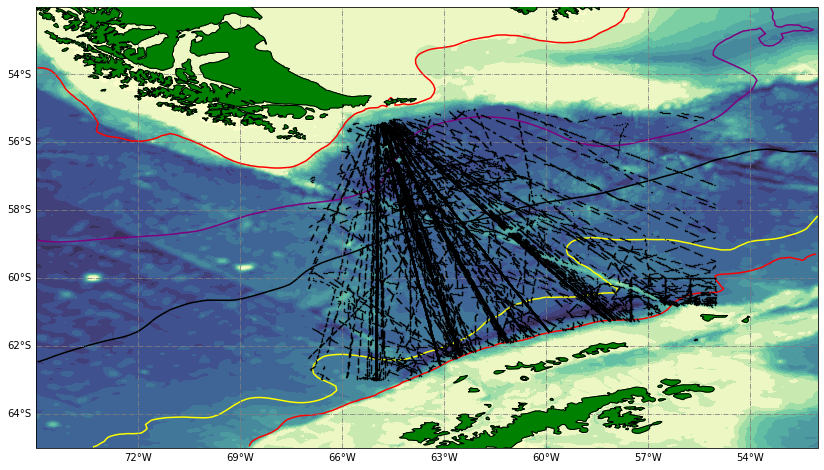

In [121]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(data_gridded['lon'], data_gridded['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

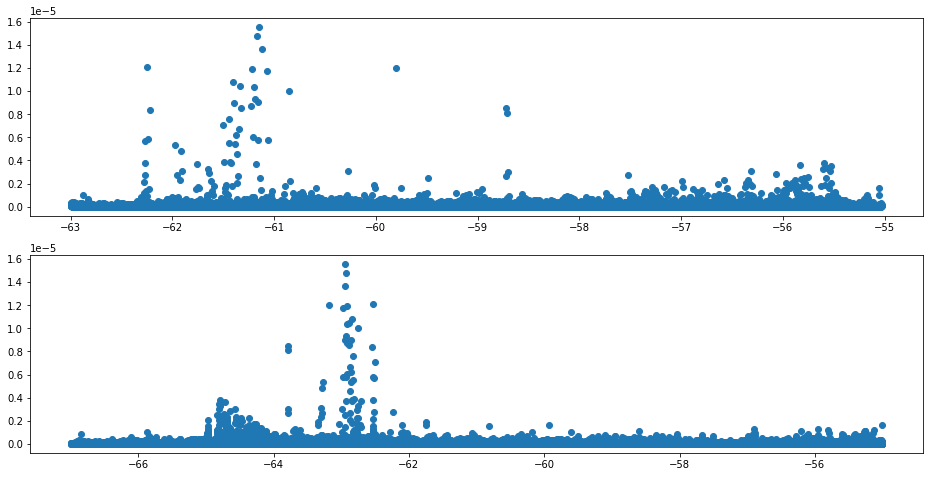

In [128]:
fig, (ax0, ax1) = plt.subplots(figsize=(16,8), nrows=2)
ax0.scatter(data_gridded['lat'], data_gridded['bx'])
ax1.scatter(data_gridded['lon'], data_gridded['bx'])

#ax.set_yscale('log')

In [65]:
data_all['distance'].mean()

761.075471107067

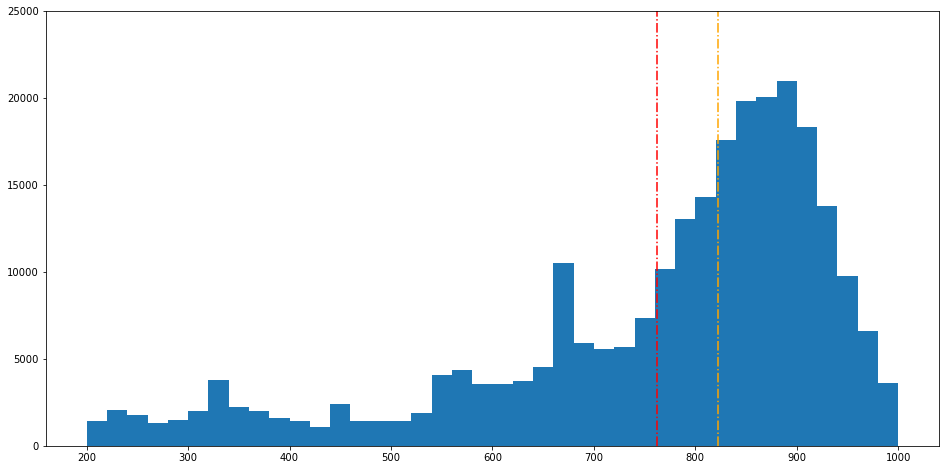

In [7]:

dist_mean = data_all['distance'].mean()
dist_median = data_all['distance'].median()

#Let´s plot bx along the track.
fig, ax0 = plt.subplots(nrows=1,figsize=(16,8))
plt.subplots_adjust(hspace=0.35)

ax0.hist(data_all['distance'],
         bins=40, #np.arange(200,1001,50),
         #density=True
         )
ax0.vlines(dist_mean, 0, 25000,
           color='red',
           linestyle='-.')
ax0.vlines(dist_median, 0, 25000,
           color='orange',
           linestyle='-.')
ax0.set_ylim(0,25000)
plt.show()


In [29]:
data_all

,datetime,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],SA,CT,rho,distance
0,2021-01-05 07:42:00,69920201226,C,-65.69037,-55.47937,NaN,34.012,6.604,NaN,33.723,2567.0,62.0,34.172751,6.609784,1026.695273,369.175674
1,2021-01-05 07:43:00,69920201226,C,-65.68552,-55.47758,NaN,34.010,6.603,NaN,33.723,2620.0,62.0,34.170741,6.608811,1026.693829,364.725227
2,2021-01-05 07:44:00,69920201226,C,-65.68065,-55.47582,NaN,34.014,6.601,NaN,33.723,2653.0,62.0,34.174760,6.606755,1026.697247,363.989202
3,2021-01-05 07:45:00,69920201226,C,-65.67589,-55.47419,NaN,34.014,6.596,NaN,33.723,2670.0,62.0,34.174760,6.601753,1026.697908,350.485465
4,2021-01-05 07:46:00,69920201226,C,-65.67108,-55.47243,NaN,34.009,6.593,NaN,33.723,2687.0,62.0,34.169736,6.598820,1026.694362,360.828737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2018-12-03 10:49:00,74JC20181202,C,-57.98340,-55.18830,NaN,34.130,5.890,7.03,34.058,3277.0,345.0,34.291678,5.893964,1026.880428,737.115513
8,2018-12-27 20:04:00,74JC20181202,C,-66.05740,-61.12980,NaN,33.790,2.290,3.23,33.768,3396.0,336.0,33.951145,2.296199,1026.981646,997.985486
9,2018-12-27 20:35:00,74JC20181202,C,-66.07300,-61.06750,NaN,33.770,2.080,2.75,33.768,3461.0,340.0,33.931022,2.086244,1026.982262,995.464189
10,2018-12-28 08:37:00,74JC20181202,C,-65.77270,-59.33140,NaN,33.830,2.060,2.82,33.867,3672.0,402.0,33.990647,2.065807,1027.031323,281.895062


In [28]:
data_all['Expocode'][6]

6     69920201226
6    06AQ20080209
6    06AQ20090322
6    06AQ20120318
6    06AQ20151207
         ...     
6    33RO20131223
6    58US20190228
6    74JC20161110
6    74JC20181103
6    74JC20181202
Name: Expocode, Length: 244, dtype: object

In [22]:
len(data_all[data_all['Expocode'] == '69920201226'])

0

In [16]:
for cruise in data_all['Expocode'].unique():
    

249

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


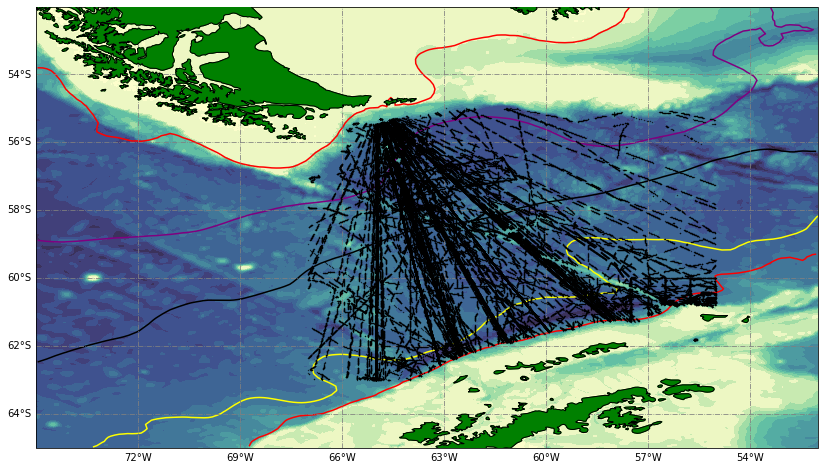

In [8]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(data_all['lon'], data_all['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

In [39]:
df = pd.read_csv('data/02_intermediate/SOCAT/33LG20020322.csv', index_col=0, parse_dates=['datetime'])
df['distance'] = np.insert(gsw.distance(df['lon'], df['lat']),0,0)
#df = df[df['distance'] > 200]
df = df.reset_index()

c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:187: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lon = lon[np.newaxis, :]
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\gsw\geostrophy.py:188: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lat = lat[np.newaxis, :]


In [76]:
df

,datetime,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],SA,CT,rho,distance
0,2002-03-23 23:55:20,33LG20020322,C,-64.9682,-55.4677,NaN,34.07,6.19,6.25,34.022,2519.0,79.0,34.231038,6.194834,1026.794896,0.000000
1,2002-03-23 23:57:27,33LG20020322,C,-64.9685,-55.4735,NaN,34.07,6.15,6.21,34.022,2546.0,80.0,34.231039,6.154820,1026.800000,645.207703
2,2002-03-23 23:59:34,33LG20020322,C,-64.9688,-55.4792,NaN,34.08,6.10,6.18,34.022,2573.0,80.0,34.241086,6.104672,1026.814252,634.092987
3,2002-03-24 00:01:41,33LG20020322,C,-64.9691,-55.4849,NaN,34.08,6.02,6.08,34.022,2598.0,81.0,34.241087,6.024646,1026.824363,634.092906
4,2002-03-24 00:03:48,33LG20020322,C,-64.9694,-55.4907,NaN,34.08,6.00,6.07,34.022,2619.0,81.0,34.241087,6.004640,1026.826879,645.207461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1719,2002-03-31 22:27:40,33LG20020322,C,-64.6807,-55.9290,NaN,34.07,5.56,5.64,34.022,3799.0,132.0,34.231090,5.564632,1026.873211,711.518783
1720,2002-03-31 22:29:47,33LG20020322,C,-64.6828,-55.9228,NaN,34.07,5.55,5.63,34.022,3795.0,132.0,34.231090,5.554629,1026.874417,701.712087
1721,2002-03-31 22:31:54,33LG20020322,C,-64.6847,-55.9165,NaN,34.07,5.52,5.62,34.022,3794.0,131.0,34.231089,5.524621,1026.878027,710.461027
1722,2002-03-31 22:34:01,33LG20020322,C,-64.6867,-55.9103,NaN,34.07,5.54,5.62,34.022,3794.0,130.0,34.231088,5.544626,1026.875620,700.584479


In [42]:
dist_limit = np.percentile(df['distance'], 95)
df_sel = df[df['distance'] <= dist_limit]
df_sel = df_sel[df_sel['distance'] > 200].reset_index(drop=True)
#df_sel = df_sel.drop(0, axis=0).reset_index(drop=True)

In [43]:
df_sel

,datetime,Expocode,QC_Flag,lon,lat,sample_depth [m],sal,T,Tequ [deg.C],WOA_SSS,ETOPO2_depth [m],dist_to_land [km],SA,CT,rho,distance
0,2002-03-23 23:57:27,33LG20020322,C,-64.9685,-55.4735,NaN,34.07,6.15,6.21,34.022,2546.0,80.0,34.231039,6.154820,1026.800000,645.207703
1,2002-03-23 23:59:34,33LG20020322,C,-64.9688,-55.4792,NaN,34.08,6.10,6.18,34.022,2573.0,80.0,34.241086,6.104672,1026.814252,634.092987
2,2002-03-24 00:01:41,33LG20020322,C,-64.9691,-55.4849,NaN,34.08,6.02,6.08,34.022,2598.0,81.0,34.241087,6.024646,1026.824363,634.092906
3,2002-03-24 00:03:48,33LG20020322,C,-64.9694,-55.4907,NaN,34.08,6.00,6.07,34.022,2619.0,81.0,34.241087,6.004640,1026.826879,645.207461
4,2002-03-24 00:05:55,33LG20020322,C,-64.9702,-55.4964,NaN,34.08,6.02,6.08,34.022,2640.0,82.0,34.241088,6.024646,1026.824364,635.811283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1630,2002-03-31 22:27:40,33LG20020322,C,-64.6807,-55.9290,NaN,34.07,5.56,5.64,34.022,3799.0,132.0,34.231090,5.564632,1026.873211,711.518783
1631,2002-03-31 22:29:47,33LG20020322,C,-64.6828,-55.9228,NaN,34.07,5.55,5.63,34.022,3795.0,132.0,34.231090,5.554629,1026.874417,701.712087
1632,2002-03-31 22:31:54,33LG20020322,C,-64.6847,-55.9165,NaN,34.07,5.52,5.62,34.022,3794.0,131.0,34.231089,5.524621,1026.878027,710.461027
1633,2002-03-31 22:34:01,33LG20020322,C,-64.6867,-55.9103,NaN,34.07,5.54,5.62,34.022,3794.0,130.0,34.231088,5.544626,1026.875620,700.584479


c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\gian_\miniconda3\envs\mthesis\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '
c:\users\gian_\repos\mthesis_gianlucca\src\GG_mthesis\d01_data\processing.py:52: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_front_sel = df_fronts_sel.set_index(['front',df_fronts_sel.index]).drop('index',1)


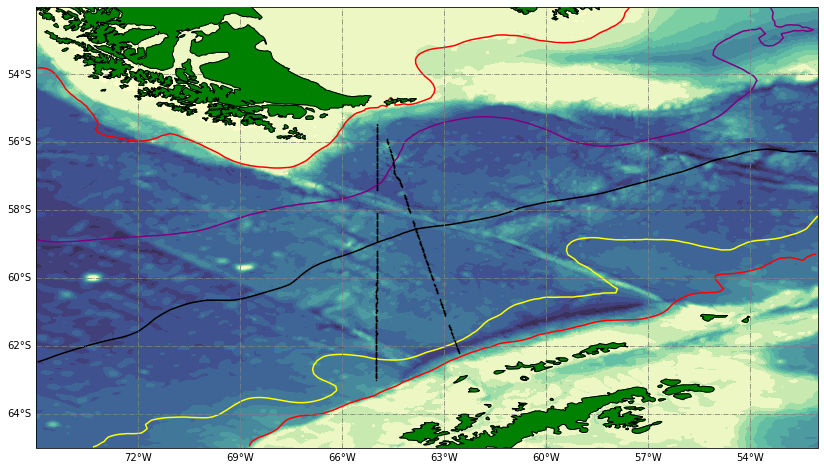

In [35]:
from GG_mthesis.d01_data.processing import rmap 
ax = rmap.plot_region()
ax.scatter(df_sel['lon'], df_sel['lat'], c='black', s=0.1,transform=ccrs.PlateCarree(), zorder=500)

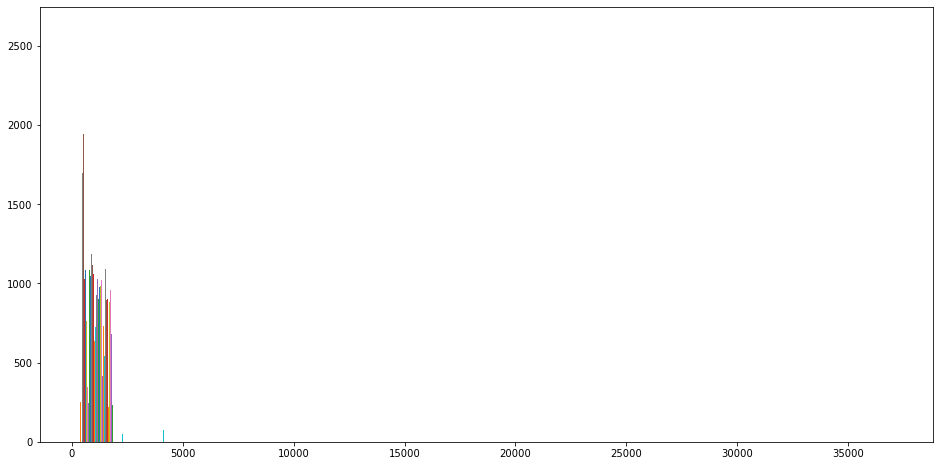

In [83]:
#Let´s plot bx along the track.
fig, ax0 = plt.subplots(nrows=1,figsize=(16,8))
plt.subplots_adjust(hspace=0.35)

ax0.hist(distances,
         bins = 20
)
plt.show()

In [47]:
df_sel['distance'].array

<PandasArray>
[  645.20770252177, 634.0929873686945, 634.0929058505989, 645.2074607738863,
 635.8112829686875, 634.5929345721584, 656.0500672024597, 633.9358790433876,
 645.0531845569188, 644.9305745385985,
 ...
 699.4768949364358,  697.482977604649,  700.563038044592, 708.4808379894877,
 700.5701836958557, 711.5187830135608,  701.712086661736, 710.4610268957408,
 700.5844785337827, 713.8223167897362]
Length: 1635, dtype: float64